


# Vamos encher o carrinho! - Instacart

# Conteúdo <a id='back'></a>

* [Introdução](#intro)
* [Objetivo do Projeto](#projectgoal)
* [1) Dicionário de Dados](#dictionary)  
* [2) Preparação de Dados](#data_preprocessing)
* [3) Plano de Solução](#plan)
    * [3.1) DataFrame `orders`](#dforders)
    * [3.2) DataFrame `products`](#dfproducts)
    * [3.3) DataFrame `departments`](#departments)
    * [3.4) DataFrame `aisles`](#dfaisles)
    * [3.5) DataFrame `order_products`](#dforderproducts)
* [4) Removendo Valores Ausentes](#missingvalues)
    * [4.1) DataFrame `products`](#dfproducts)
    * [4.2) DataFrame `orders`](#dforders)
    * [4.3) DataFrame `order_products`](#dforderproducts)
* [5) Análise de Dados](#datanalysis)
    * [5.1) Verificação se os valores fazem sentido](#valuesmakesense)
    * [5.2) Quantas pessoas fazem pedidos a cada hora do dia?](#ordersateachhour)
    * [5.3) Em que dia da semana as pessoas fazem compras?](#dayoftheweek)
    * [5.4) Quanto tempo as pessoas esperam até fazer outro pedido?](#waitbeforeplacing)
    * [5.5) Diferenças nas quartas e sábados em 'order_hour_of_day'](#orderhourofday)
    * [5.6) Distribuição do número de pedidos por cliente](#ordersnumberperclient)
    * [5.7) Os 20 produtos mais populares](#20mostpopularproducts)
    * [5.8) Quantos itens as pessoas normalmente compram em um pedido?](#howmanyitemsperorder)
    * [5.9) Os 20 principais itens incluídos mais frequentemente em pedidos repetidos](#20itemsmostinrepeatorders)
    * [5.10) Para cada produto, qual parcela de todos os pedidos dele são repetidos?](#proportionordersrepetead)
    * [5.11) Os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros](#20Itemsbeforeeveryone)
* [Conclusão Geral](#end)

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados foi modificado do original.


# Objetivo do Projeto

O objetivo deste projeto é limpar os dados e preparar um relatório que forneça informações sobre os hábitos de compra dos clientes da Instacart. 

## Dicionário de Dados

Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


## Preparação de Dados

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt# Importe as bibliotecas

In [2]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep = ';', decimal='.')
products_df = pd.read_csv('/datasets/products.csv', sep = ';', decimal='.')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep = ';', decimal='.')
departments_df = pd.read_csv('/datasets/departments.csv', sep = ';', decimal='.')
order_products_df = pd.read_csv('/datasets/order_products.csv', sep = ';', decimal='.')
# leia os conjuntos de dados em DataFrames

In [3]:
column_names = [
    'order_id',
    'user_id',
    'order_number',
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order'
]

orders_df.info()
orders_df.head()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
column_names = [
    'product_id',
    'product_name',
    'aisle_id',
    'department_id' 
]

products_df.info()
products_df.head()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
column_names = [
    'order_id',
    'product_id',
    'add_to_cart_order',
    'reordered' 
]

aisles_df.info(show_counts=True)
aisles_df.head()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
column_names = [
    'aisle_id',
    'aisle',
]

departments_df.info()
departments_df.head()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
column_names = [
    'department_id',
    'department'
]

order_products_df.info()
order_products_df.head()# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Após análise das informações dadas através do método info(), conseguimos levantar as seguintes informações sobre os DataFrames:

- Número de linhas (RangeIndex: o número de entries varia para cada DF)
- Número de colunas (varia para cada DF)
- Nome de cada coluna (Column)
- Número de valores em cada coluna que não estão ausentes (Non-Null Count)
- Tipo de dados de cada coluna (Dtype)

- O tipo de dados não é o mesmo em todos os df (object, float64, int64);
- O "df3" não forneceu o número de de valores não-nulos presentes. Logo, foi aplicado 'show_counts=True' para imprimir as contagens de valores não nulos;
- O número e nomes das colunas são diferentes em cada df;
- O parâmetro utilizado em todos os df foi "sep = ';', decimal='.'".


## Plano de Solução

Após chamar o método info() e visualizar as informações gerais dos DataFrames, podemos começar determinando o número de valores ausentes e duplicados, e com as informações organizadas, vamos preencher valores ausentes, e eliminar os duplicados para facilitar nosso processamento de dados posteriormente. 

### DataFrame `orders`

In [8]:
orders_duplicated = orders_df.duplicated().sum()
print(orders_duplicated)# Verificar se há pedidos duplicados

15


As linhas duplicadas possuem padrão de dia e hora (quarta-feira e 2 da manhã)

In [9]:
wednesday_orders_at_2am = orders_df[(orders_df['order_dow'] == 2) & (orders_df['order_hour_of_day'] == 2)]
print(wednesday_orders_at_2am)# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

O que esse resultado quer dizer? Essa análise é útil para entender os padrões de comportamento dos clientes, como por exemplo, se há um número significativo de pedidos feitos em um horário específico durante a semana. Isso pode ser usado para ajustar a operação do negócio, como alocação de recursos ou promoções específicas para esse horário.

In [10]:
orders_df = orders_df.drop_duplicates()# Remova pedidos duplicados

In [11]:
orders_df.duplicated().sum()# Verifique as linhas duplicadas mais uma vez

0

In [12]:
print(orders_df.duplicated(subset=['order_id']).sum())# Verifique novamente apenas os IDs de pedidos duplicados

0


Após remover as linhas duplicadas do DataFrame orders_df, não havia mais linhas duplicadas em todo o DataFrame.
Especificamente em relação aos IDs de pedidos, não havia IDs de pedidos duplicados após a remoção das linhas duplicadas.

### DataFrame `products`

In [13]:
products_df.duplicated().sum()# Verifique se há linhas completamente duplicadas

0

In [14]:
print(products_df.duplicated(subset=['department_id']).sum())# Verifique apenas se há IDs de departamentos duplicados

49673


In [15]:
product_name_lower = products_df['product_name'].str.lower()
product_name_duplicated = product_name_lower.duplicated().sum()
print(product_name_duplicated)# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)


1361


In [16]:
print(products_df['product_name'].value_counts(dropna=True))# Verifique os nomes de produtos duplicados que não estão faltando

Face Exfoliate                                        1
Tropical Fusion Liquid Water Enhancer                 1
Ranch Peppercorn Dressing                             1
Original Export Sodas Crackers                        1
Honey Patties- Chocolate Almond                       1
                                                     ..
Avocado Oil Non-Stick Cooking Spray                   1
Compleats Good Mornings Sausage Breakfast Scramble    1
Almond Milk Beeswax Hand Creme                        1
Ultra Clean Mint Floss                                1
Organic Jumbo Garlic                                  1
Name: product_name, Length: 48436, dtype: int64


Não há linhas completamente duplicadas.
Não há IDs de departamentos duplicados.
Quando os nomes dos produtos foram convertidos para minúsculas para facilitar a comparação, descobrimos que existem alguns nomes de produtos duplicados.

A impressão do valor contado dos nomes de produtos no DF me permitiu identificar quais nomes de produtos estão duplicados, mas não estão faltando no conjunto de dados. Essa verificação me permite garantir a integridade dos dados, eliminando duplicatas que podem levar a inconsistências ou distorções nas análises posteriores.

### DataFrame `departments`

In [17]:
departments_df.duplicated().sum()# Verifique se há linhas completamente duplicadas

0

In [18]:
print(products_df.duplicated(subset=['department_id']).sum())# Verifique apenas se há IDs dos produtos duplicados

49673


Não há ações imediatas necessárias, pois não foram encontradas duplicatas.

### DataFrame `aisles`

In [19]:
aisles_df.duplicated().sum()# Verifique se há linhas completamente duplicadas

0

In [20]:
aisles_df.duplicated(subset=['aisle_id']).sum()# Verifique apenas se há IDs dos produtos duplicados

0

Não há ações imediatas necessárias, pois não foram encontradas duplicatas.

### DataFrame `order_products`

In [21]:
order_products_df.duplicated().sum()# Verifique se há linhas completamente duplicadas

0

In [22]:
order_products_df.value_counts()# Verifique mais uma vez se há outros casos complicados de duplicados

order_id  product_id  add_to_cart_order  reordered
4         10054       5.0                1            1
2277733   35233       5.0                1            1
2277734   15233       4.0                1            1
          11471       2.0                1            1
          6374        3.0                1            1
                                                     ..
1145037   26790       21.0               1            1
          27767       10.0               1            1
          32086       16.0               0            1
          33572       5.0                1            1
3421079   30136       1.0                0            1
Length: 4544171, dtype: int64

Não foram encontradas linhas completamente duplicadas no DataFrame.

## Removendo Valores Ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
missing_products = products_df[products_df['product_name'].isna()]

print(missing_products)# Encontre valores ausentes na coluna 'product_name'

products_df['product_name'].isna().sum()

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


1258

Há linhas no DataFrame onde o nome do produto está ausente (NaN).

In [24]:
missing_products['aisle_id'].unique() 
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?

array([100])

Todos os produtos com nomes ausentes estão associados ao ID de seção 100.

In [25]:
missing_products['department_id'].unique() # Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

array([21])

Todos os produtos com nomes ausentes estão associados ao ID de departamento 21.

In [26]:
aisles_df[aisles_df['aisle_id'] == 100]
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.

,aisle_id,aisle
99,100,missing


In [27]:
departments_df[departments_df['department_id'] == 21]

,department_id,department
20,21,missing


A seção com o ID 100 e o departamento com o ID 21 podem ser usados para produtos que não foram adequadamente categorizados em uma seção ou departamento específico.

In [28]:

products_df['product_name'].fillna('Unknown', inplace=True)

print(products_df)# Preencha nomes de produtos ausentes com 'Unknown'

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

Foram substituídos os valores ausentes por um valor padrão, como "Unknown", para que as linhas não sejam perdidas durante as análises subsequentes.

### DataFrame `orders`

In [29]:
missing_orders = orders_df.isna().sum()
print(missing_orders)# Encontre os valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
orders_df[orders_df['order_number'] > 1].isna().sum()# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

O resultado de missing_orders fornece a contagem de valores ausentes para cada coluna no orders_df. Isso nos permite identificar em quais colunas existem valores ausentes e em que quantidade. Ao filtrar o DataFrame para os clientes com 'order_number' maior que 1 e, em seguida, verificar a presença de valores ausentes usando isna().sum(), podemos determinar se há valores ausentes específicos para clientes que já fizeram pedidos anteriores.

### DataFrame `order_products`

In [31]:
missing_order_products = order_products_df.isna().sum()
print(missing_order_products)# Encontre os valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
min_order_id = order_products_df['add_to_cart_order'].min()
print(min_order_id)

1.0


In [33]:
max_order_id = order_products_df['add_to_cart_order'].max()
print(max_order_id)# Quais são os valores mínimo e máximo dessa coluna?

64.0


'missing_order_products' fornece a contagem de valores ausentes para cada coluna em order_products_df. Isso nos permite identificar em quais colunas existem valores ausentes e em que quantidade.

Ao imprimir os valores máximos (max()) e mínimos (min()) de cada coluna, podemos entender a faixa de valores em cada coluna. O valor mínimo é igual a 1, isso significa que o primeiro item adicionado ao carrinho tem esse valor de ordem. Por outro lado, o valor máximo representa o número total de itens diferentes em um único pedido, nesse caso é 64.

In [34]:
df_ausente = order_products_df[~order_products_df['add_to_cart_order'].isna() == True]['product_id'].drop_duplicates()
print(df_ausente)# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

0          11440
1           1560
2          26683
3           8670
4           1940
           ...  
4539981    45226
4540724    25201
4540999    49153
4541048     8182
4542909    40024
Name: product_id, Length: 45572, dtype: int64


In [35]:
order_products_df[order_products_df['product_id'].isin(df_ausente)].groupby('order_id')['product_id'].count().min()# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem


1

In [36]:

order_products_df['add_to_cart_order'].fillna('999', inplace=True)

order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)

print(order_products_df)# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]


A variável df_ausente contém todos os IDs dos pedidos que têm pelo menos um valor ausente na coluna 'add_to_cart_order'.
Ao agrupar, podemos verificar se todos os pedidos com valores ausentes contêm mais de 64 produtos. Os valores ausentes na coluna 'add_to_cart_order' foram preenchidos com o valor '999' e a coluna foi convertida para o tipo inteiro. 

Conclusão Parcial

Até agora, no projeto, realizamos várias etapas importantes de pré-processamento de dados e análise exploratória: 

- Carregamento dos Dados;
- Pré-processamento dos Dados;
- Análise Exploratória de Dados (AED);
- Aplicamos correções aos dados.

O pré-processamento de dados e a análise exploratória realizados até agora são fundamentais para garantir que os dados estejam prontos para análises mais avançadas.

## Análise de dados

### Verificação se os valores fazem sentido

In [37]:
print(orders_df)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

Os valores nas colunas 'order_hour_of_day' e 'order_dow' na tabela orders fazem sentido, tendo os valores da coluna 'order_hour_of_day' variando entre 0 a 23 e os da 'order_dow' entre 0 a 6, nessa amostra.

### Quantas pessoas fazem pedidos a cada hora do dia?

In [38]:
hour_orders = orders_df.groupby('order_hour_of_day')['order_id'].count()
print(hour_orders)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


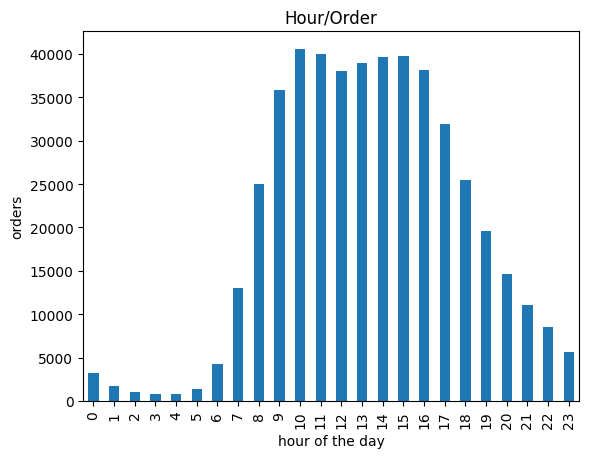

In [39]:
hour_orders.plot(kind='bar',
                title= 'Hour/Order',
                xlabel="hour of the day",
                ylabel="orders")
plt.show()

A quantidade de pedidos varia ao longo do dia, com picos e vales em diferentes horas.
O pico de pedidos parece ocorrer em torno das 10h ou 11h da manhã, seguido por uma diminuição gradual ao longo do dia.
Os padrões de compra das pessoas podem ser influenciados por vários fatores, como horários de trabalho, por exemplo. 


### Em que dia da semana as pessoas fazem compras?

In [40]:
dow_orders = orders_df.groupby('order_dow')['order_id'].count()
print(dow_orders)

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


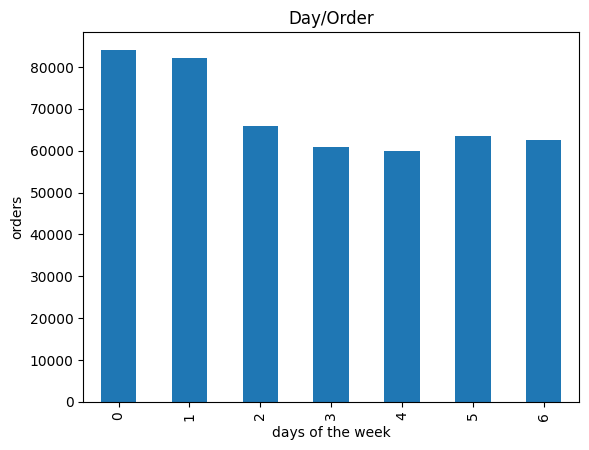

In [41]:
dow_orders.plot(kind='bar',
                title= 'Day/Order',
                xlabel="days of the week",
                ylabel="orders")
plt.show()

Podemos observar que há um aumento significativo na quantidade de pedidos nos dias próximos ao final de semana, como quinta-feira e sexta-feira. Isso sugere que muitas pessoas preferem fazer compras antes do final de semana.

### Quanto tempo as pessoas esperam até fazer outro pedido?

In [42]:
last_orders = orders_df.groupby('days_since_prior_order')['order_id'].count()
print(last_orders)

days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: order_id, dtype: int64


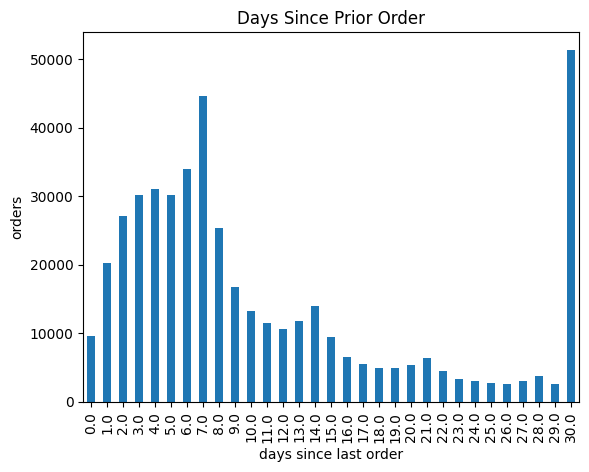

In [43]:
last_orders.plot(kind='bar',
                title= 'Days Since Prior Order',
                xlabel="days since last order",
                ylabel="orders")
plt.show()

Muitas pessoas fazem pedidos no primeiro dia após o último pedido. Isso pode indicar que alguns clientes fazem pedidos diariamente.
Além disso, existem outros picos em intervalos como 7 dias, 14 dias e 30 dias, o que sugere que muitas pessoas têm padrões de compra semanais, quinzenais ou mensais.

### Diferenças nas quartas e sábados em `'order_hour_of_day'`.

In [44]:
wednesday_orders = orders_df[orders_df['order_dow'] == 3]
print(wednesday_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
6        2511640   148233            40          3                  8   
16       3109465    55090            19          3                 15   
28        133707   182261             1          3                 10   
30       1890318   193501             3          3                 15   
35        125325   106853             6          3                 19   
...          ...      ...           ...        ...                ...   
478917    972799    89702             4          3                  7   
478946   2406747    63101            11          3                  8   
478956    640934    27104             9          3                 10   
478963   3270802   112087             2          3                 13   
478965    216274     4391             3          3                  8   

        days_since_prior_order  
6                          2.0  
16                         9.0  
28                      

In [45]:
saturday_orders = orders_df[orders_df['order_dow'] == 6]
print(saturday_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
11        102585   191558            18          6                 16   
14       2843219    74699             4          6                 11   
20         50934   178510             9          6                  9   
26       1844247   122558             4          6                 18   
...          ...      ...           ...        ...                ...   
478924   3274344   145367            13          6                 10   
478930    489820     7287            14          6                 19   
478943    548902     6829             3          6                 10   
478954    984024    47076             2          6                 21   
478961   3006133    34561             7          6                 10   

        days_since_prior_order  
0                         30.0  
11                         8.0  
14                      

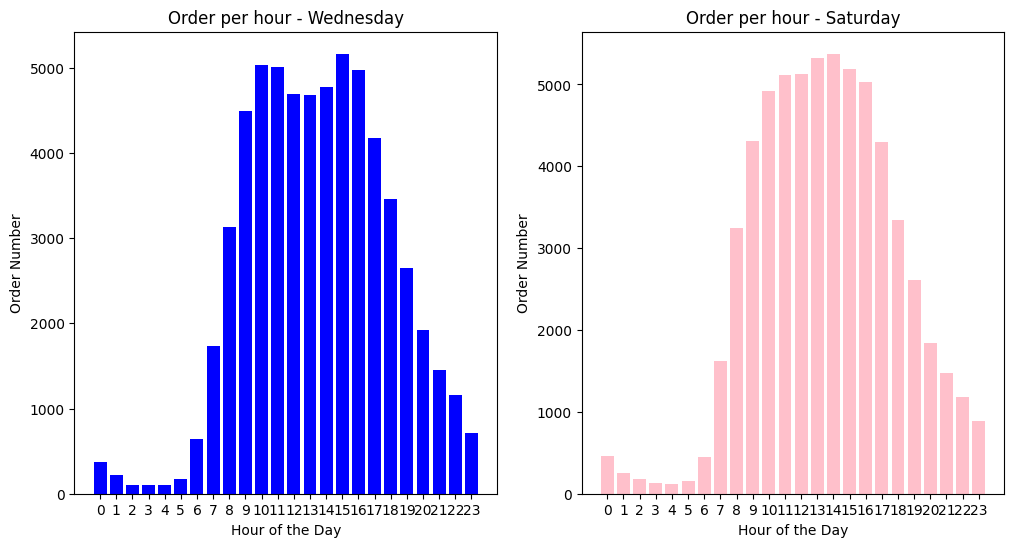

In [46]:
wednesday_hour_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hour_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(wednesday_hour_counts.index, wednesday_hour_counts.values, color='blue')
plt.title('Order per hour - Wednesday')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Number')
plt.xticks(range(0, 24))

plt.subplot(1, 2, 2)
plt.bar(saturday_hour_counts.index, saturday_hour_counts.values, color='pink')
plt.title('Order per hour - Saturday')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Number')
plt.xticks(range(0, 24))


plt.show()

Os histogramas de vendas acima mostra dois picos de valores mais frequentes. Isso pode ser devido a diferenças no número de compras nos dois dias. Entretanto, percebe-se que a diferença de vendas nas quartas e sábados é relativamente baixa.

### Distribuição do número de pedidos por cliente

In [47]:
orders_per_customer = orders_df['user_id'].value_counts()

In [48]:
print(orders_per_customer)

149605    28
193164    26
78375     25
148162    24
66664     24
          ..
166116     1
63564      1
170214     1
51274      1
2047       1
Name: user_id, Length: 157437, dtype: int64


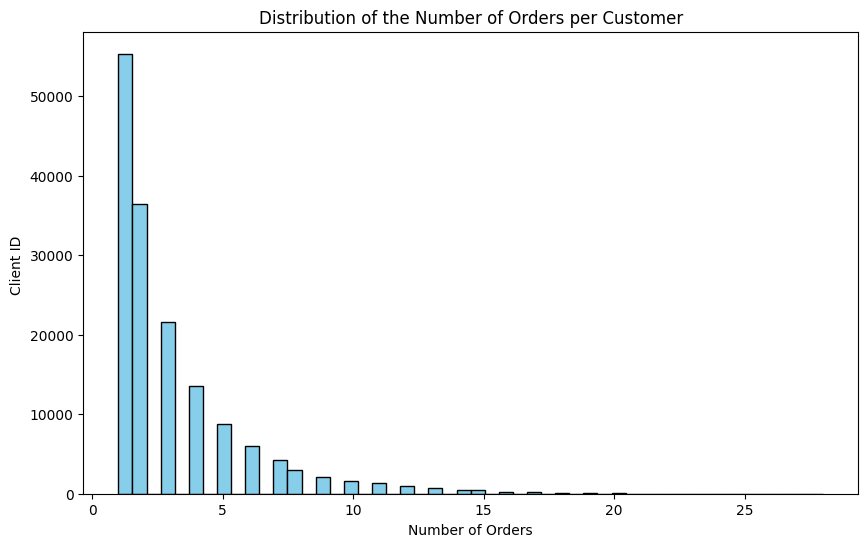

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of the Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Client ID ')
plt.show()

Alguns clientes podem fazer pedidos com frequência (até 10 pedidos), enquanto outros podem fazer pedidos de forma mais esporádica.

### Os 20 produtos mais populares

In [50]:
top20_products = order_products_df.groupby('product_id').count().sort_values(by= 'order_id', ascending=False).head(20).reset_index()

In [51]:
merged_df = pd.merge(top20_products, products_df, on= 'product_id')
merged_df = merged_df.rename(columns={'order_id': 'frequencia'})

In [52]:
print(merged_df[['product_id', 'product_name', 'frequencia']])

    product_id              product_name  frequencia
0        24852                    Banana       66050
1        13176    Bag of Organic Bananas       53297
2        21137      Organic Strawberries       37039
3        21903      Organic Baby Spinach       33971
4        47209      Organic Hass Avocado       29773
5        47766           Organic Avocado       24689
6        47626               Large Lemon       21495
7        16797              Strawberries       20018
8        26209                     Limes       19690
9        27845        Organic Whole Milk       19600
10       27966       Organic Raspberries       19197
11       22935      Organic Yellow Onion       15898
12       24964            Organic Garlic       15292
13       45007          Organic Zucchini       14584
14       39275       Organic Blueberries       13879
15       49683            Cucumber Kirby       13675
16       28204        Organic Fuji Apple       12544
17        5876             Organic Lemon      

A maioria dos produtos listados são frutas e vegetais orgânicos, como bananas, morangos, espinafre e abacates.

### Quantos itens as pessoas normalmente compram em um pedido?

In [53]:
items_per_order = order_products_df.groupby('order_id')['add_to_cart_order'].count()
print(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: add_to_cart_order, Length: 450046, dtype: int64


In [54]:
mean_items_per_order = items_per_order.mean()
print(mean_items_per_order)

10.098983215049127


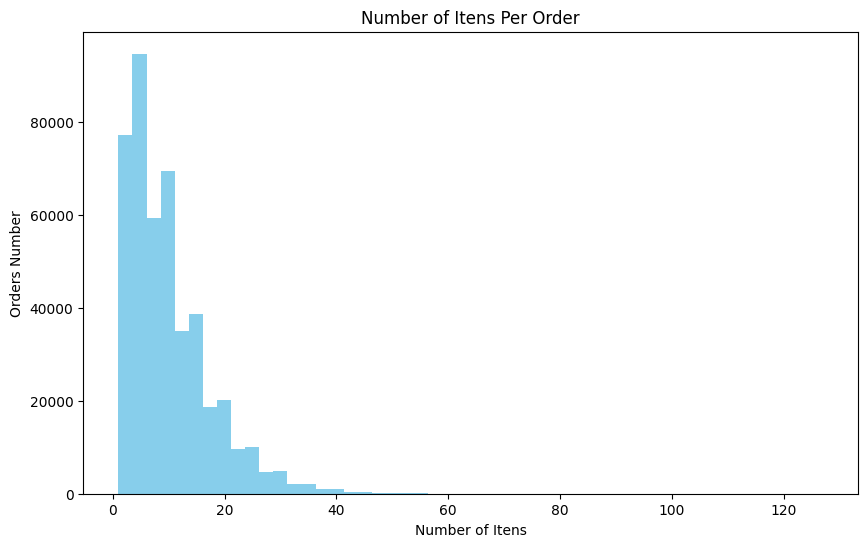

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=50, color='skyblue')
plt.title('Number of Itens Per Order')
plt.xlabel('Number of Itens')
plt.ylabel('Orders Number')
plt.show()

A maioria dos pedidos parece ter um número relativamente baixo de itens, com uma queda acentuada na frequência à medida que o número de itens aumenta.

### Os 20 principais itens incluídos mais frequentemente em pedidos repetidos

In [56]:
order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [57]:
top_reordered_items = order_products_df[order_products_df['reordered'] == 1].groupby('product_id').count().sort_values(by='order_id', ascending=False).tail(20)
print(top_reordered_items)

            order_id  add_to_cart_order  reordered
product_id                                        
7111               1                  1          1
7108               1                  1          1
7107               1                  1          1
32821              1                  1          1
32824              1                  1          1
42750              1                  1          1
42747              1                  1          1
12160              1                  1          1
42745              1                  1          1
7106               1                  1          1
21016              1                  1          1
7102               1                  1          1
12178              1                  1          1
7096               1                  1          1
2903               1                  1          1
7092               1                  1          1
21003              1                  1          1
32856              1           

In [58]:
# Obtendo os IDs e nomes dos itens mais frequentemente incluídos em pedidos repetidos
top_reordered_items_info = pd.merge(top_reordered_items, products_df[['product_id', 'product_name']], on='product_id', how='left')
print(top_reordered_items_info)

    product_id  order_id  add_to_cart_order  reordered  \
0         7111         1                  1          1   
1         7108         1                  1          1   
2         7107         1                  1          1   
3        32821         1                  1          1   
4        32824         1                  1          1   
5        42750         1                  1          1   
6        42747         1                  1          1   
7        12160         1                  1          1   
8        42745         1                  1          1   
9         7106         1                  1          1   
10       21016         1                  1          1   
11        7102         1                  1          1   
12       12178         1                  1          1   
13        7096         1                  1          1   
14        2903         1                  1          1   
15        7092         1                  1          1   
16       21003

Esses itens são frequentemente incluídos em pedidos repetidos, o que sugere que eles são populares entre os clientes e têm alta demanda ao longo do tempo

### Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [59]:
# Contagem total de pedidos para cada produto
total_orders_per_product = order_products_df.groupby('product_id')['order_id'].nunique()

In [60]:
repeated_orders_per_product = order_products_df[order_products_df['reordered'] == 1].groupby('product_id')['order_id'].nunique()

In [61]:
repeated_order_fraction_per_product = repeated_orders_per_product / total_orders_per_product

In [62]:
print(repeated_order_fraction_per_product.fillna(0))

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: order_id, Length: 45573, dtype: float64


Esses valores representam a proporção de pedidos de cada produto que são repetidos em relação ao número total de pedidos desse produto.

### Os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros

In [63]:
order_products_df = order_products_df[order_products_df['add_to_cart_order'] == 1]
product_counts = order_products_df['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

In [64]:
top_products = product_counts.head(20)

In [65]:

top_products_info = pd.merge(top_products, products_df[['product_id', 'product_name']], on='product_id', how='left')
print(top_products_info)

    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          

# Conclusão Geral

O projeto não apenas forneceu uma análise detalhada dos dados, mas também destacou a importância da análise de dados na compreensão do comportamento do cliente e na orientação de estratégias de negócios bem-sucedidas.

A análise dos dados revelou padrões significativos no comportamento de compra dos clientes, incluindo os horários e dias mais populares para fazer pedidos, foi possível identificar quais itens têm alta demanda entre os clientes.
A investigação da frequência de pedidos repetidos revelou a fidelidade dos clientes a certos produtos.
As informações obtidas ao longo do projeto são valiosas para a otimização de estratégias de negócios. 